# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rizky Aditya
- **Email:** rizky.aditya41119@gmail.com
- **ID Dicoding:** rzad20

## Menentukan Pertanyaan Bisnis

1. Berdasarkan data peminjaman selama 2 tahun, di jam berapa saja rara-rata penyewaan sepeda paling banyak?
2. Pada musim apa jumlah peminjaman sepeda mengalami peningkatan yang signifikan?
3. Apakah kondisi cuaca tertentu dapat mempengaruhi besar atau sedikitnya jumlah peminjaman sepeda?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Bagian dataset yang digunakan adalah **Hour.csv**

In [5]:
#Mengambil dan Menampilkan dataset
dataset_bike = pd.read_csv('/content/drive/MyDrive/Bike_Sharing/hour.csv')
dataset_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Langkah selanjutnya adalah menilai tabel dataset_bike

In [6]:
dataset_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengacu kepada panduan data dalam file 'Readme.txt', terdapat beberapa data kategorikal yang masih harus dikonversi dan diubah datanya, seperti Yr, mnth, holiday, weekday, workingday, weathersit.

nilai temp, atemp, dan hum juga sudah dalam bentuk yang dinormalisasi, dalam proses cleaning data, kolom tersebut akan dikembalikan datanya menjadi seperti semula.

beberapa nama kolom juga masih sulit untuk dibaca, dalam proses cleaning data, beberapa kolom akan diubah dan diperbaiki namanya agar lebih *Readable*

Selanjutnya mencari apakah ada nilai kosong / missing values dalam dataset

In [7]:
dataset_bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Diketahui tidak ada data mising values dalam dataset yang ada

In [8]:
#Cek Jumlah Duplikasi Data
print("Jumlah duplikasi: ", dataset_bike.duplicated().sum())

Jumlah duplikasi:  0


Diketahui tidak ada nilai duplikasi dalam dataset yang ada, proses akan dilanjutkan dengan merapikan data.

In [9]:
dataset_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Pertama, beberapa kategori data akan diubah sesuai dengan seharusnya

In [10]:
dataset_bike['dteday'] = pd.to_datetime(dataset_bike['dteday'])
dataset_bike['season'] = dataset_bike.season.astype('category')
dataset_bike['mnth'] = dataset_bike.mnth.astype('category')
dataset_bike['holiday'] = dataset_bike.holiday.astype('category')
dataset_bike['weekday'] = dataset_bike.weekday.astype('category')
dataset_bike['workingday'] = dataset_bike.workingday.astype('category')
dataset_bike['weathersit'] = dataset_bike.weathersit.astype('category')

Berikut info data setelah dilakukan perubahan tipe dikategori terkait

In [11]:
dataset_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Selanjutnya adalah mengkonversi nilai pada kolom kategori variabel agar kembali berdasarkan kriteria yang ditujukan pada readme.txt

In [12]:
dataset_bike.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
dataset_bike.yr.replace((0,1), (2011,2012), inplace=True)
dataset_bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
dataset_bike.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
dataset_bike.workingday.replace((0,1),('No', 'Yes'), inplace=True)
dataset_bike.holiday.replace((0,1),('No', 'Yes'), inplace=True)
dataset_bike.weathersit.replace((1,2,3,4), ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'), inplace=True)

Kolom *Instant* tidak akan digunakan dikarenakan kolom tersebut hanya merupakan *record index* dari data peminjaman sepeda, oleh karena itu, kolom tersebut akan di *drop*

In [13]:
dataset_bike = dataset_bike.drop("instant", axis=1)
dataset_bike.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


Beberapa nama kolom masih sulit untuk dibaca oleh karena itu, nama kolom akan dirubah agar lebih mudah dipahami

In [29]:
dataset_bike.rename(columns = {
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt' : 'total_count'
}, inplace = True)

Nilai numerik *temperature*, *atemp*, *humidity*, dan *windspeed* masih dalam nilai yang sudah dinormalisasi, nilai tersebut akan di kembalikan kembali ke nilai semula

In [15]:
dataset_bike['temperature'] = dataset_bike['temperature']*41
dataset_bike['atemp'] = dataset_bike['atemp']*50
dataset_bike['humidity'] = dataset_bike['humidity']*100
dataset_bike['windspeed'] = dataset_bike['windspeed']*67

berikut adalah dataset setelah proses pembersihan

In [16]:
dataset_bike.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total count
0,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

####Explorasi dataset_bike

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data hour_df menggunakan method describe()

In [17]:
dataset_bike.describe(include="all")

<ipython-input-17-6ac483c0c38d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset_bike.describe(include="all")


,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total count
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,NaN,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


Terlihat dalam rangkuman parameter statistik diatas, terdapat 17739 baris data, rata-rata jam penyewaan terjadi pada jam 11.54 (terlihat dari data mean)

Selanjutnya, data akan dieksplorasi berdasarkan jumlah peminjaman dalam jam selama 2 tahun terakhir

In [18]:
dataset_bike.groupby(by='hour').agg({
      "total_count" : ["sum","mean"]
    })

total count            
             sum        mean
hour                        
0          39130   53.898072
1          24164   33.375691
2          16352   22.869930
3           8174   11.727403
4           4428    6.352941
5          14261   19.889819
6          55132   76.044138
7         154171  212.064649
8         261001  359.011004
9         159438  219.309491
10        126257  173.668501
11        151320  208.143054
12        184414  253.315934
13        184919  253.661180
14        175652  240.949246
15        183149  251.233196
16        227748  311.983562
17        336860  461.452055
18        309772  425.510989
19        226789  311.523352
20        164550  226.030220
21        125445  172.314560
22         95612  131.335165
23         63941   87.831044

Terlihat dalam data bahwa peminjaman terbanyak dalam 2 tahun terakhir itu terjadi pada jam 17.00

Sekarang data akan dieksplorasi berdasarkan musim

In [19]:
dataset_bike.groupby(by='season').agg({
      "total_count" : ["sum","mean"]
    })

total count            
               sum        mean
season                        
Spring      471348  111.114569
Summer      918589  208.344069
Fall       1061129  236.016237
Winter      841613  198.868856

Diketahui dalam data, bahwa musim gugur (*fall*) adalah musim dimana tingkat penyewaan data terbanyak, disusul oleh musim panas

Sekarang, mari lihat jumlah dan rata-rata peminjaman sepeda berdasarkan kondisi cuaca

In [30]:
dataset_bike.groupby(by='weather').agg({
      "total_count" : ["sum","mean"]
    })

total_count            
                       sum        mean
weather                               
Clear              2338173  204.869272
Misty               795952  175.165493
Light_rainsnow      158331  111.579281
Heavy_rainsnow         223   74.333333

Dalam eksplorasi data diatas, dapat disimpulkan jika kondisi cuaca sangat mempengaruhi tingkat peminjaman sepeda, dimana kondisi cuaca yang baik (*clear*), jumlah peminjaman sepeda cenderung paling banyak, sedangkan ketika berkabut, jumlah peminjaman akan berkurang, dan ketika cuaca sangat buruk (*heavy rainsnow*) , jumlah peminjaman sepeda akan menurun drastis

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Berdasarkan data peminjaman selama 2 tahun, di jam berapa rata-rata penyewaan sepeda biasanya paling banyak?

Pertama lakukan grouping terhadap kolom hours dan total count

In [35]:
avg_rent_by_hours = dataset_bike.groupby("hour").total_count.mean().sort_values(ascending=False).reset_index()
avg_rent_by_hours.rename(columns={
    "total_count" : "avg_peminjaman",
    "hour" : "jam"
})

,jam,avg_peminjaman
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


Akan diambil 3 jam dengan rata-rata jumlah peminjaman terbanyak, selanjutnya plot data yang sudah dikelompokkan diatas kedalam barplot

<ipython-input-44-a27b0824c73b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-44-a27b0824c73b>:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


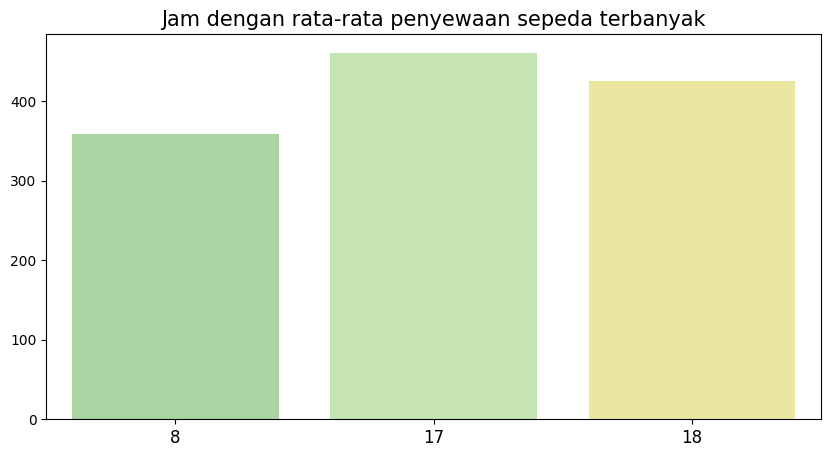

In [44]:
colors = ['#A5DD9B', '#C5EBAA', '#F6F193', '#F2C18D']
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_count",
    x="hour",
    data=avg_rent_by_hours.sort_values(by="total_count", ascending=False).head(3),
    palette=colors
)
plt.title("Jam dengan rata-rata penyewaan sepeda terbanyak", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

### Pada musim apa jumlah peminjaman sepeda mengalami peningkatan yang signifikan?

Untuk melakukan hal tersebut, pertama, kelompokkan data peminjaman berdasarkan musim

In [45]:
rent_by_season=dataset_bike.groupby("season").total_count.sum().sort_values(ascending=False).reset_index()

In [47]:
rent_by_season

,season,total_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Lanjutkan dengan membuat barplot

<ipython-input-51-7b5a9f358804>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


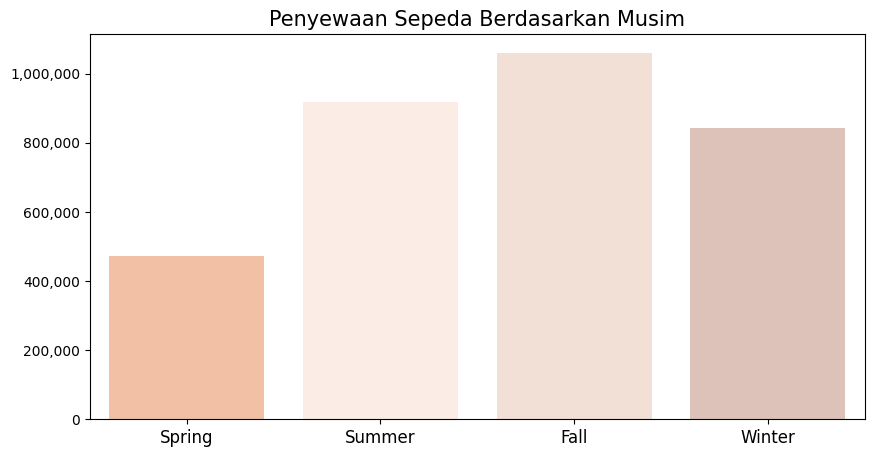

In [51]:
colors = ['#FFBE98', '#FEECE2', '#F7DED0', '#E2BFB3']
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_count",
    x="season",
    data=rent_by_season.sort_values(by="total_count", ascending=False),
    palette=colors
)
plt.title("Penyewaan Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

### Pertanyaan 3

### Dapatkah mengelompokkan pelanggan berdasarkan preferensi cuaca tertentu?

Kelompokkan data berdasarkan preferensi cuaca tertentu, disini gunakan nilai unique nya

In [66]:
customer_by_weather=dataset_bike.groupby("weather").total_count.nunique().sort_values(ascending=False).reset_index()
customer_by_weather

,weather,total_count
0,Clear,848
1,Misty,649
2,Light_rainsnow,368
3,Heavy_rainsnow,3


Visualisasikan dalam barplot

<ipython-input-71-e28feba4b381>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


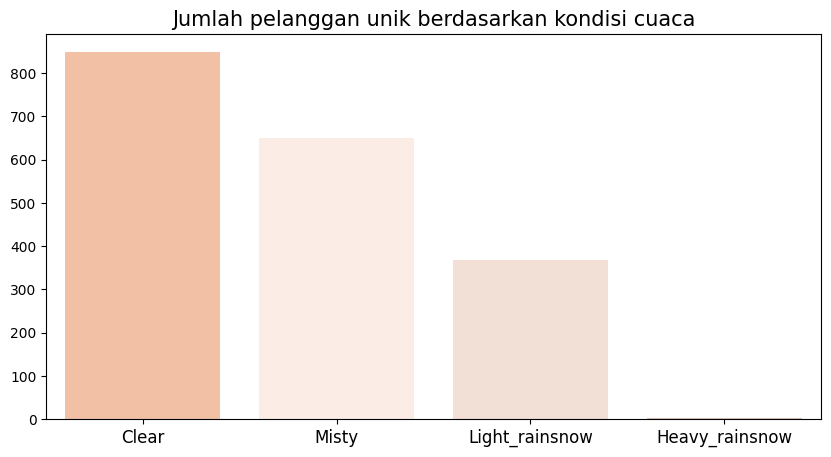

In [71]:
colors = ['#FFBE98', '#FEECE2', '#F7DED0', '#E2BFB3']
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_count",
    x="weather",
    data=customer_by_weather.sort_values(by="total_count", ascending=False),
    palette=colors
)
plt.title("Jumlah pelanggan unik berdasarkan kondisi cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

## Conclusion

- Dari hasil analisa, dalam 2 tahun terakhir, jam dengan rata-rata peminjaman terbanyak adalah jam 17.00, 18.00, dan jam 08.00.
- Berdasarkan analisa jumlah pelanggan dilihat dari musim, terlihat bahwa penyewaan terbanyak terjadi pada musim gugur
- Berdasarkan visualisasi data, dapat disimpulkan jika kondisi cuaca sangat mempengaruhi tingkat peminjaman sepeda, dimana kondisi cuaca yang baik (*clear*), jumlah peminjaman sepeda cenderung paling banyak, sedangkan ketika berkabut, jumlah peminjaman akan berkurang, dan ketika cuaca sangat buruk (*heavy rainsnow*) , jumlah peminjaman sepeda akan menurun drastis